First Implementation: Simple Recursive Multiplication

In [1]:
def add_strings(x: str, y: str) -> str:
    """
    Add two nonnegative integer strings by converting to int.
    This method can be rewritten as a sum/carry adder for a
    single digit addition, pulling characters from the
    input strings. For simplicity now, we just convert the
    whole string to integer, do the addition, and then
    convert the number back to string.
    """
    return str(int(x) + int(y))


def simple_recursive_multiplication(x: str, y: str) -> str:
    """
    Recursive multiplication for nonnegative integer strings.
    Assumptions:
      - len(x) == len(y)
      - len(x) is a power of two
      - x and y contain only digits
    Uses:
      xy = ac*10^n + (ad+bc)*10^(n/2) + bd
    """
    # Number of digits in x, y
    n = len(x)
    
    # Base case
    if n == 1:
        return str(int(x) * int(y))
    
    # Middle of x, y for splitting them in left/right halves
    m = n // 2
    
    # Divide x, y into left/right halves
    a = x[:m]
    b = x[m:]
    c = y[:m]
    d = y[m:]
    
    # Compute the partial solution
    ac = simple_recursive_multiplication(a, c)
    ad = simple_recursive_multiplication(a, d)
    bc = simple_recursive_multiplication(b, c)
    bd = simple_recursive_multiplication(b, d)
    
    # Conquer the partial solutions
    ad_plus_bc = add_strings(ad, bc)
    
    # Multiply by powers of 10 via appending zeros (string shift).
    term1 = ac + ("0" * n)
    term2 = ad_plus_bc + ("0" * m)
    
    # Final sum (Using int conversion for addition to keep things simple)
    return str(int(term1) + int(term2) + int(bd))

# --- quick sanity checks ---
if __name__ == "__main__":
    tests = [
        ("12", "34"),
        ("99", "99"),
        ("0123", "0456"),
        ("1234", "5678"),
        ("0000", "0000"),
        ("1111", "0001"),
        ("1234567890123456", "9876543210123456"),
        ("12345678901234561234567890123456", "12345678901234561234567890123456"),
        ("1234567890123456123456789012345612345678901234561234567890123456", "1234567890123456123456789012345612345678901234561234567890123456"),
    ]

    for x, y in tests:
        # Compare against Python int multiplication for correctness.
        got = simple_recursive_multiplication(x, y)
        want = str(int(x) * int(y))
        print(f"{x} * {y} = {got}  (ok={got == want})")


12 * 34 = 408  (ok=True)
99 * 99 = 9801  (ok=True)
0123 * 0456 = 56088  (ok=True)
1234 * 5678 = 7006652  (ok=True)
0000 * 0000 = 0  (ok=True)
1111 * 0001 = 1111  (ok=True)
1234567890123456 * 9876543210123456 = 12193263112635260231976841383936  (ok=True)
12345678901234561234567890123456 * 12345678901234561234567890123456 = 152415787532388203170249644871236061576303002601726870921383936  (ok=True)
1234567890123456123456789012345612345678901234561234567890123456 * 1234567890123456123456789012345612345678901234561234567890123456 = 1524157875323882031702496448712391098920536503657902759142813607364731048132908548544433921658436061576303002601726870921383936  (ok=True)


Karatsuba Implementation: replacing some intermediate multiplication steps with addition/subtraction steps

In [6]:
import math

def add_strings(x: str, y: str) -> str:
    """
    Add two nonnegative integer strings by converting to int.
    This method can be rewritten as a sum/carry adder for a
    single digit addition, pulling characters from the
    input strings. For simplicity now, we just convert the
    whole string to integer, do the addition, and then
    convert the number back to string.
    """  
    return str(int(x) + int(y))

def karatsuba_multiplication(x: str, y: str) -> str:
    """
    Recursive multiplication for nonnegative integer strings.
    Assumptions:
      - len(x) == len(y)
      - len(x) is a power of two
      - x and y contain only digits
    Uses:
      xy = ac*10^n + (ad+bc)*10^(n/2) + bd
    """
    #CHECKING ASSUMPTIONS
        #at first I thought this wouldn't be an issue because all the of the input pairs are even lengths and powers of two
        #but as we do addition internally sometimes x and y become uneven lengths or not powers of two
    
    #1) does len(x) == len(y)?
    #if not, we want to add leading zeroes to make them equal lengths
    if len(x) != len(y):
        if len(x) > len(y):
            y = ("0" * (len(x) - len(y))) + y
        else: 
            x = ("0" * (len(y) - len(x))) + x
    
    #2) is len(x) a power of two? 
    #if not, we want to add leading zeroes so both numbers are powers of two
    if math.log2(len(x)).is_integer() == False: #if not a power of 2
        
        #make both x and y have a length that is the next power of 2
        desired_length = len(x)
        
        #increase the desired length until we reach a power of two
        while math.log2(desired_length).is_integer()== False:
            desired_length += 1
        
        #then we make sure the final length of x and y is equal to this length
        y = ("0" * (desired_length - len(y))) + y
        x = ("0" * (desired_length - len(x))) + x
    
    # find the number of digits in x, y
    n = len(x)
    
    # Base case
    if n == 1: #if x is down to one digit now
        return str(int(x) * int(y)) #we turn x and y into integers and we multiply them directly
    
    #if x is still longer than one digit, we split it in halves of length m
    m = n // 2
    
    # Divide x, y into left/right halves to make a,b,c,d
    a = x[:m]
    b = x[m:]
    c = y[:m]
    d = y[m:]
    
    #multiply each of the parts together
    #for karatsuba: we don't need to calculate ALL of these, just ac, bd, and then we do karatsuba(a+b, c+d) - ac - bd
    ac = karatsuba_multiplication(a, c)
    bd = karatsuba_multiplication(b, d)
    
    #Add ab and cd together for when we calculate our middle term, eliminates a multiplication step in simple algorithm
    a_plus_b = add_strings(a, b)
    c_plus_d = add_strings(c, d)
    
    #do karatsuba on a+b and c+d, then subtract ac and bd
    ad_plus_bc = str(int(karatsuba_multiplication(a_plus_b, c_plus_d)) - int(ac) - int(bd))
    
    # Multiply by powers of 10 via appending zeros (string shift).
    term1 = ac + ("0" * n)
    term2 = ad_plus_bc + ("0" * m)
    
    # Final sum (Using int conversion for addition to keep things simple)
    return str(int(term1) + int(term2) + int(bd))

# --- quick sanity checks ---
if __name__ == "__main__":
    tests = [
        ("12", "34"),
        ("99", "99"),
        ("0123", "0456"),
        ("1234", "5678"),
        ("0000", "0000"),
        ("1111", "0001"),
        ("1234567890123456", "9876543210123456"),
        ("12345678901234561234567890123456", "12345678901234561234567890123456"),
        ("1234567890123456123456789012345612345678901234561234567890123456", "1234567890123456123456789012345612345678901234561234567890123456"),
    ]

    for x, y in tests:
        # Compare against Python int multiplication for correctness.
        got = karatsuba_multiplication(x, y)
        want = str(int(x) * int(y))
        print(f"{x} * {y} = {got}  (ok={got == want})")


12 * 34 = 408  (ok=True)
99 * 99 = 9801  (ok=True)
0123 * 0456 = 56088  (ok=True)
1234 * 5678 = 7006652  (ok=True)
0000 * 0000 = 0  (ok=True)
1111 * 0001 = 1111  (ok=True)
1234567890123456 * 9876543210123456 = 12193263112635260231976841383936  (ok=True)
12345678901234561234567890123456 * 12345678901234561234567890123456 = 152415787532388203170249644871236061576303002601726870921383936  (ok=True)
1234567890123456123456789012345612345678901234561234567890123456 * 1234567890123456123456789012345612345678901234561234567890123456 = 1524157875323882031702496448712391098920536503657902759142813607364731048132908548544433921658436061576303002601726870921383936  (ok=True)


[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
[4.6209000174712855e-05, 0.0004409160001159762, 0.0001444579997951223, 0.00023308400022870046, 0.0003179589998580923, 0.0007225419999485894, 0.0009352500001114095, 0.0015457079998668632, 0.002312708000317798, 0.004565208999792958]
[1.849999989644857e-05, 6.658399979642127e-05, 0.0002489580001565628, 0.0009987499997805571, 0.004285083000013401, 0.013512834000266594, 0.03979312499996013, 0.1288137920000736, 0.49883895899984054, 1.9429854579998391]


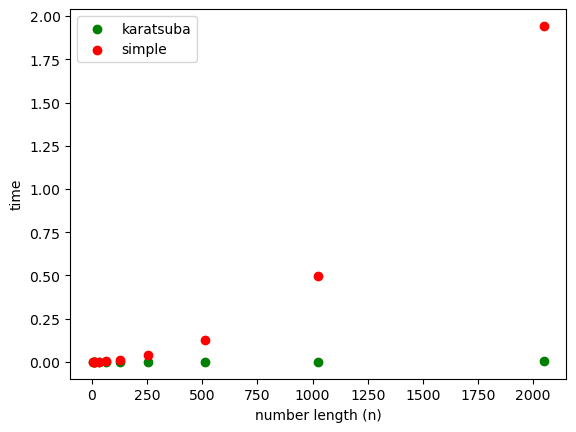

In [11]:
#ok, now we are measuring time complexity for both algorithms
import time
import numpy
import random
import matplotlib.pyplot as plt

if __name__ == "__main__":
    
    n = 4
    
    n_values = list()
    kara_time = list()
    simp_time = list()
    
    while n <= 2048:
        
        #generate two random numbers between 0 and max number with n digits
        random_num_1 = str(random.randrange(0, 10*n))
        random_num_2 = str(random.randrange(0, 10*n))
        
        #add leading zeroes as needed to make sure length of number is equal to n
        random_num_1 = ("0" * (n - len(random_num_1))) + random_num_1
        random_num_2 = ("0" * (n - len(random_num_2))) + random_num_2
        
        #do karatsuba with time measurement
        start_time_kara = time.perf_counter()
        kara_results = karatsuba_multiplication(random_num_1, random_num_2)
        end_time_kara = time.perf_counter()
        
        #do simple recursive with time measurement
        start_time_simp= time.perf_counter()
        simp_results = simple_recursive_multiplication(random_num_1, random_num_2)
        end_time_simp = time.perf_counter()
        
        #add results to lists 
        n_values.append(n)
        kara_time.append(end_time_kara - start_time_kara)
        simp_time.append(end_time_simp - start_time_simp)
    
        #increment n by a power of 2
        n = n * 2
    

print(n_values)
print(kara_time)
print(simp_time)

#I'm going to plot it too so it's easier for me to see the difference
plt.scatter(n_values, kara_time, color="green", label = "karatsuba")
plt.scatter(n_values, simp_time, color= "red", label = "simple")

plt.xlabel('number length (n)')
plt.ylabel('time')
plt.legend()

plt.show()

Comments on simple recursive vs karatsuba complexity: The simple recursion shows a quadratic complexity, with time increasing noticeably as n increases. In contrast, the karatsuba calculations appear to take relatively the same amount of time even as n increases. This emphasizes that eliminating unnecessary multiplication steps can decrease the processing time. 

Comments on assumptions: In my karatsuba function, I had to check assumptions and add leading zeroes anyways to handle the addition steps. So theoretically even if the original input numbers don't meet those assumptions, I believe this should still work. In this case, the code would add zeroes at the beginning of each number to make it a power of two before doing any calculations.